In [2]:
import pandas as pd
import numpy as np
import scanpy as sc
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt

import os 
import sys
import gc

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.sans-serif'] = 'Arial'
sc.set_figure_params(dpi=50, dpi_save=300, vector_friendly=True)
sns.set_style('white', {'axes.grid' : False})
from matplotlib.pyplot import rc_context

sys.path.append('/home/lee/project/scanpy_func/')

import scanpy_func as sf

def vector(on=False):
    if on:
        sc.set_figure_params(dpi=50, dpi_save=300, vector_friendly=False)
    else:
        sc.set_figure_params(dpi=50, dpi_save=300, vector_friendly=True)
vector(False)

In [2]:
adata = sc.read_h5ad('./herv.h5ad')

## herv length

In [5]:
meta = pd.read_csv('/storage/zhufan/01.herv/annotation/herv.info.bed', sep='\t',header=None)
meta.columns = ['chr', 'start', 'end', 'id', 'strand', 'family']
meta['length'] = meta['end'] - meta['start']
meta['length']

0         1224
1          271
2          363
3           86
4          957
          ... 
692754      52
692755     639
692756     555
692757     216
692758     559
Name: length, Length: 692759, dtype: int64

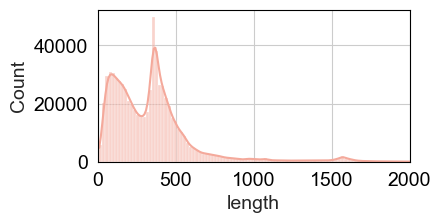

In [6]:
data = meta['length']
data = data[data<=2000]

fig, ax = plt.subplots(figsize=(4,2))
sns.histplot(data, ax=ax, kde=True, bins=100, color='#F4A99B', alpha=0.5)
ax.set_xlim(0,2000)
# plt.xscale("log")
plt.savefig('./fig/total_dist.pdf')

In [8]:
meta.index = meta['id']
adata.var['length'] = meta['length']

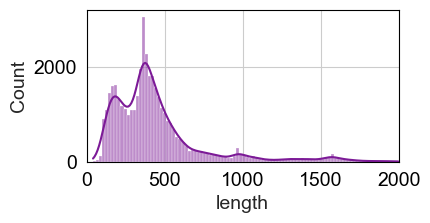

In [10]:
data = adata.var['length']
data = data[data<=2000]

fig, ax = plt.subplots(figsize=(4,2))
sns.histplot(data, ax=ax, kde=True, bins=100, color='#7C1A97', alpha=0.5)
ax.set_xlim(0,2000)
# plt.yscale("log")
plt.savefig('exp_dist.pdf')

In [72]:
meta[meta['id'].isin(adata.var_names)].sort_values(['chr','start']).iloc[:,0:6].to_csv('./herv.anno.bed',sep = "\t",header = None,index = None)

## herv_family

In [13]:
family_df = pd.read_csv('/storage/zhufan/01.herv/annotation/herv.info.bed',sep = '\t',header = None)
family_df

,0,1,2,3,4,5
0,chr1,159383131,159384355,MSTA-int-chr1,+,ERVL-MaLR
1,chr1,226492180,226492451,HUERS-P3b-int-chr1,-,ERV1
2,chr1,6291168,6291531,MLT1C-chr1,+,ERVL-MaLR
3,chr1,26214343,26214429,MLT1K-chr1,-,ERVL-MaLR
4,chr1,29359333,29360290,LTR5_Hs-chr1,+,ERVK
...,...,...,...,...,...,...
692754,chr22,50802798,50802850,MER72_dup6-chr22,-,ERV1
692755,chr22,50803158,50803797,MER72_dup7-chr22,-,ERV1
692756,chr22,50804200,50804755,MER34C__dup6-chr22,-,ERV1
692757,chr22,50805391,50805607,LTR60B_dup2-chr22,+,ERV1


In [14]:
family_df.index = family_df[3]
adata.var['family'] = family_df[5]

In [15]:
ratio1 = adata.var['family'].value_counts()
ratio1 = ratio1[['ERVL-MaLR', 'ERV1', 'ERVL', 'ERVK', 'Gypsy','Other']]
ratio1

family
ERVL-MaLR    19117
ERV1         12986
ERVL          7016
ERVK          1394
Gypsy          438
Other          509
Name: count, dtype: int64

In [18]:
ratio2 = family_df[5].value_counts()
ratio2 = ratio2[['ERVL-MaLR', 'ERV1', 'ERVL', 'ERVK', 'Gypsy','Other']]
ratio2

5
ERVL-MaLR    333723
ERV1         165173
ERVL         154565
ERVK           9866
Gypsy         16073
Other         13359
Name: count, dtype: int64

In [19]:
df_ratio = pd.DataFrame([ratio2, ratio1], index=['total', 'expr']).T
df_ratio

,total,expr
ERVL-MaLR,333723,19117
ERV1,165173,12986
ERVL,154565,7016
ERVK,9866,1394
Gypsy,16073,438
Other,13359,509


In [20]:
df_ratio = df_ratio / df_ratio.sum()
df_ratio

,total,expr
ERVL-MaLR,0.481730,0.461095
ERV1,0.238428,0.313218
ERVL,0.223115,0.169223
ERVK,0.014242,0.033623
Gypsy,0.023201,0.010564
Other,0.019284,0.012277


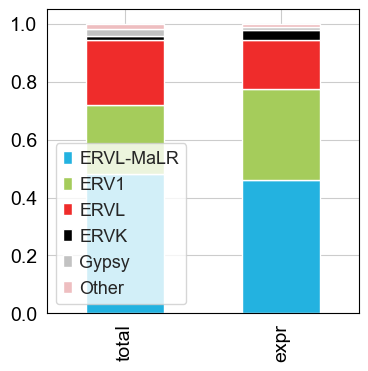

In [23]:
color6 = [ "#EEBEC0",	"#C2C2C2",	"#000000", 	"#EF2C2B",  	"#A5CC5B", "#23B2E0", ]
df_ratio.T.plot(kind='bar', stacked=True, 
                color=color6[::-1])
plt.savefig('./fig/family_ratio.pdf')

## herv_genome_anno

In [24]:
df = adata.var['anno'].value_counts()
df

anno
Distal Intergenic       18324
intron_opposite_lian    10591
intron_sample_lian       9713
Promoter                 2746
Downstream (<=300bp)       86
Name: count, dtype: int64

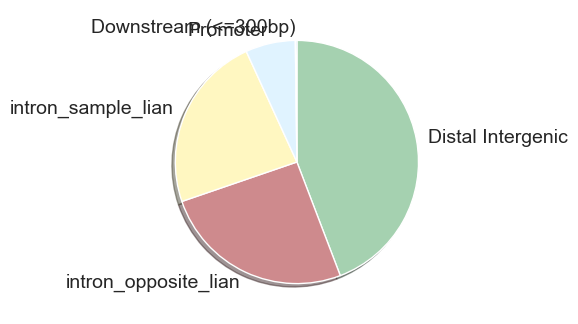

In [26]:
# color6 = ["#C72228", 	"#F98F34", 	"#0C4E9B", 	"#F5867F", 	"#FFBC80", 	"#6B98C4"]
plt.pie(df, labels=df.index, startangle=90, shadow=True, counterclock=False, colors=sf.color10 )
plt.savefig('./fig/fig1/herv_pie.pdf')

## n_genes_by_counts

In [34]:
adata.obs['total_counts'] = adata.X.sum(axis=1) 

/home/zhufan/anaconda3/envs/cellphonedb/lib/python3.12/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/home/zhufan/anaconda3/envs/cellphonedb/lib/python3.12/site-packages/scanpy/plotting/_anndata.py:839: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  ax = sns.violinplot(
/home/zhufan/anaconda3/envs/cellphonedb/lib/python3.12/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


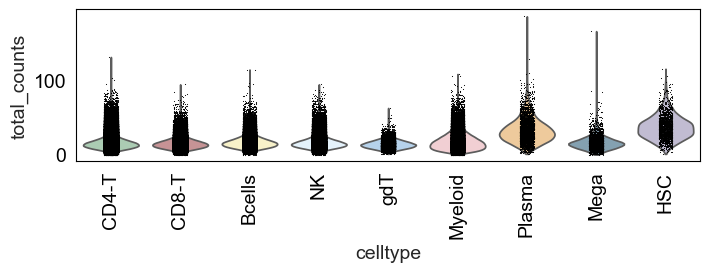

In [35]:
colors = ["#A5D1B0", 
"#CE8A8D", 
"#FFF7C1", 
"#E0F3FF", 
"#ADD3F4", 
"#F7C9CF", 
"#FCCB8E", 
"#7CA3B8", 
"#BFB8D6", 
"#FCCB8E"]
order = ['CD4-T', 'CD8-T','Bcells', 'NK', 'gdT', 'Myeloid',  'Plasma', 'Mega', 'HSC' ]
with rc_context(rc={'figure.figsize': (8,2)}):
    y = 'total_counts'
    fig, ax = plt.subplots()
    sc.pl.violin(adata, keys=[y], groupby='celltype', stripplot=False, show=False,
                 rotation=90, palette=colors, order=order, ax=ax)
    sns.stripplot(data=adata.obs, x='celltype', y=y, rasterized=True, size=0.8, ax=ax, color='black')

    ax.grid(False)
plt.savefig('./fig/fig1/herv_qc2.pdf')
plt.show()

/home/zhufan/anaconda3/envs/cellphonedb/lib/python3.12/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/home/zhufan/anaconda3/envs/cellphonedb/lib/python3.12/site-packages/scanpy/plotting/_anndata.py:839: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  ax = sns.violinplot(
/home/zhufan/anaconda3/envs/cellphonedb/lib/python3.12/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


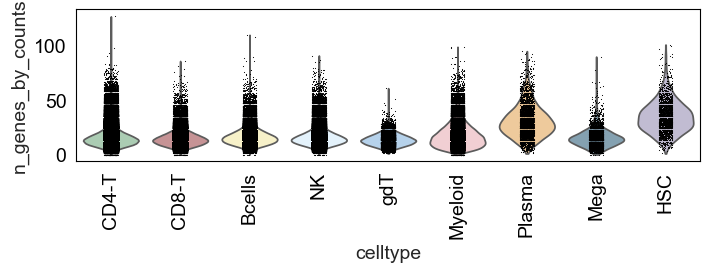

In [37]:
from scipy import sparse
adata.obs['n_genes_by_counts'] = (adata.X > 0).sum(axis=1).A1 if sparse.issparse(adata.X) else (adata.X > 0).sum(axis=1)
order = ['CD4-T', 'CD8-T','Bcells', 'NK', 'gdT', 'Myeloid',  'Plasma', 'Mega', 'HSC' ]
with rc_context(rc={'figure.figsize': (8,2)}):
    y = 'n_genes_by_counts'
    fig, ax = plt.subplots()
    sc.pl.violin(adata, keys=[y], groupby='celltype', stripplot=False, show=False,
                 rotation=90, palette=colors, order=order, ax=ax)
    sns.stripplot(data=adata.obs, x='celltype', y=y, rasterized=True, size=0.8, ax=ax, color='black')

    ax.grid(False)
plt.savefig('herv_qc.pdf')
plt.show()

## herv_gene corr

In [27]:
adata_indiv = sc.read_h5ad('herv_indiv.h5ad')
rna_indiv = sc.read_h5ad('gene_indiv.h5ad')

In [31]:
sc.pp.filter_genes(adata_indiv,min_cells=0)

In [33]:
adata_indiv.var

,type,n_cells
MLT1D_dup10-chr1,herv,51
MLT1D_dup13-chr1,herv,165
LTR67B-chr1,herv,120
LTR79-chr1,herv,96
MSTD_dup10-chr1,herv,49
...,...,...
THE1D_dup86-chrY,herv,53
THE1C-int_dup17-chrY,herv,26
THE1C_dup93-chrY,herv,83
LTR16A_dup4-chrY,herv,70


In [138]:
import pybedtools
from pybedtools import BedTool

In [ ]:
herv = BedTool('herv.anno.bed').sort().saveas()
genes = BedTool('/storage/zhufan/01.herv/annotation/Homo_sapiens.GRCh38.104.gene_location.bed').sort().saveas()

closest = herv.closest(
    genes,
    t="first",
    d=True,
    nonamecheck=True,
    stream=True  
)

In [ ]:
results = []
for feature in closest:
    
    herv_id = feature.fields[3]  
    
   
    gene_name = feature.fields[9] if len(feature.fields) >= 10 else 'NA'
    
    results.append([herv_id, gene_name])


result_df = pd.DataFrame(results, columns=['HERV_ID', 'Nearest_Gene'])

In [141]:
result_df

,HERV_ID,Nearest_Gene
0,MLT1D_dup10-chr1,U6
1,MLT1D_dup13-chr1,RNU6-1199P
2,LTR67B-chr1,LINC01409
3,LTR79-chr1,LINC01409
4,MSTD_dup10-chr1,PERM1
...,...,...
41455,THE1D_dup86-chrY,NEFLP1
41456,THE1C-int_dup17-chrY,NEFLP1
41457,THE1C_dup93-chrY,NEFLP1
41458,LTR16A_dup4-chrY,NEFLP1


In [142]:
result_df.index = result_df['HERV_ID']
adata.var['gene'] = result_df['Nearest_Gene']

In [148]:
adata_indiv.var['gene'] = result_df['Nearest_Gene']

In [160]:
adata_indiv.var['anno'] = adata.var['anno']

In [162]:
import scipy as sp
r_list = list()
p_list = list()

for herv_id in adata_indiv.var_names:
    try:
        r, p = sp.stats.pearsonr(adata_indiv[:, herv_id].X[:, 0], rna_indiv[:, adata_indiv.var.loc[herv_id, 'gene']].X[:, 0])
        r_list.append(r)
        p_list.append(p)
    except:
        r_list.append(np.nan)
        p_list.append(np.nan)       

In [189]:
df = adata.var.copy()
df['r'] = r_list
df['r2'] = [x**2 for x in r_list]
df['p'] = p_list
df['mean'] = adata_indiv.X.mean(axis=0)

df.dropna(inplace=True)
df['logP'] = -np.log10(df['p'])

/home/zhufan/anaconda3/envs/cellphonedb/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [35]:
df.to_csv('herv_rna_corr.csv')

In [36]:
df = pd.read_csv('herv_rna_corr.csv',index_col = 0)

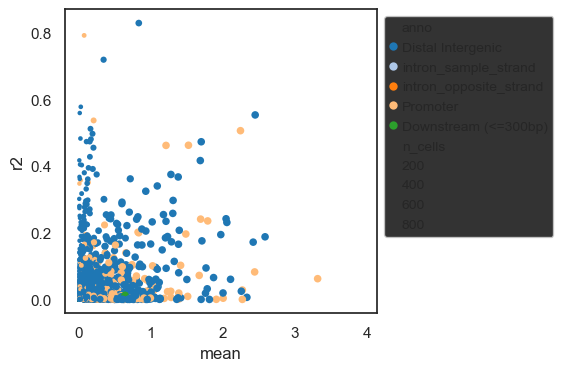

In [40]:
import random
h = df.index.tolist()
random.shuffle(h)
df = df.loc[h, :]
df = df[df['mean'] <=4]
sns.scatterplot(data=df, x='mean', y='r2', hue='anno', size='n_cells',sizes=(10, 30), linewidth=0, palette='tab20',
               hue_order = ['Distal Intergenic', 'intron_sample_strand', 'intron_opposite_strand', 'Promoter', 'Downstream (<=300bp)'])

# sns.scatterplot(data=df.loc[df['anno']=='intron_opposite_strand'], x='mean', y='r')

# sns.scatterplot(data=df.loc[df['anno']=='intron_sample_strand'], x='mean', y='r')
plt.legend(
    bbox_to_anchor=(1.0, 1.0),
    fontsize='small',
)
plt.savefig('./fig/fig1/herv_corr.pdf')

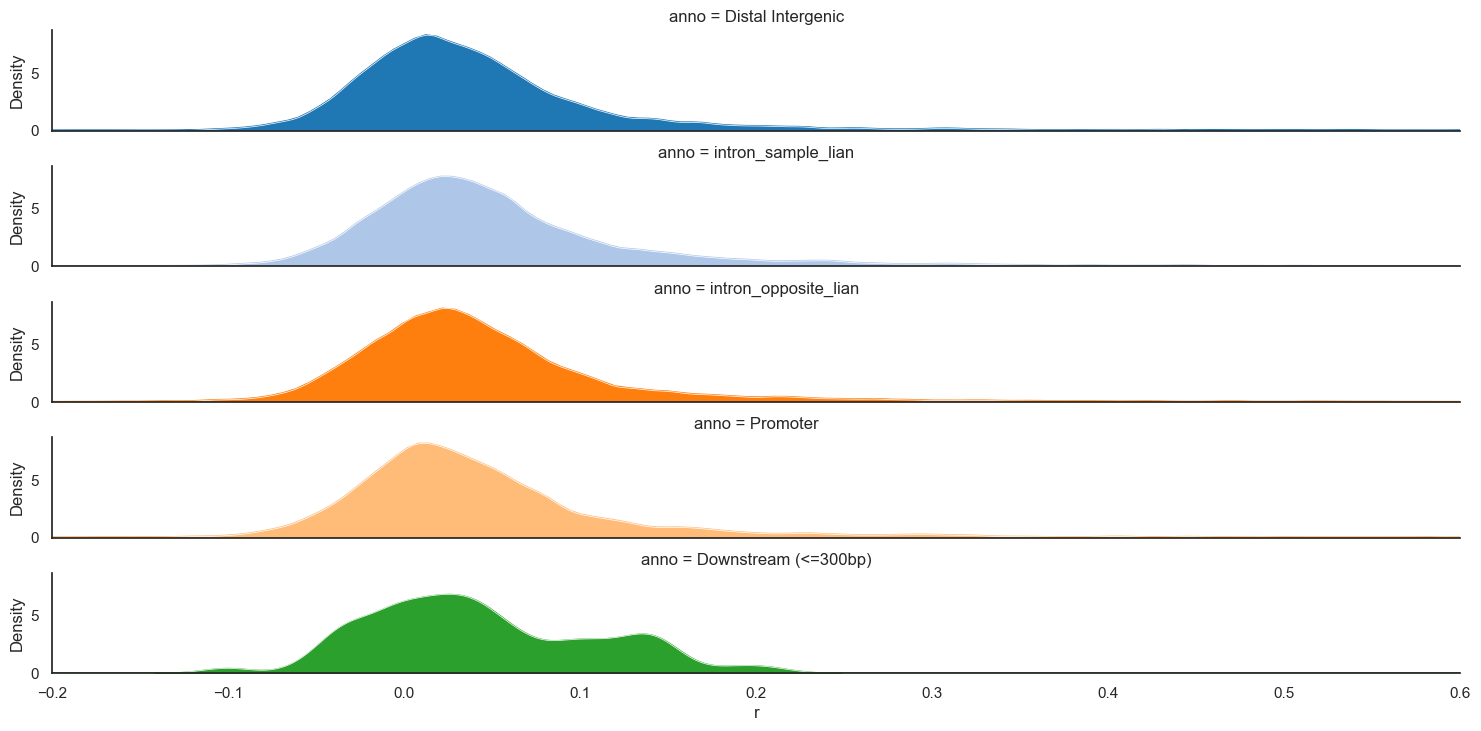

In [24]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
order = ['Distal Intergenic', 'intron_sample_lian', 'intron_opposite_lian', 'Promoter','Downstream (<=300bp)']
# Initialize the FacetGrid object
g = sns.FacetGrid(df, row="anno", hue="anno", aspect=10, height=1.5, palette='tab20', hue_order=order, xlim=(-0.2, 0.6))

# Draw the densities in a few steps
g.map(sns.kdeplot, "r",
      bw_adjust=.5, clip_on=True,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "r", clip_on=True,clip=(-0.2, 0.6), color="w", lw=0.5, bw_adjust=.5)


# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=True)

# Define and use a simple function to label the plot in axes coordinates
# def label(x, color, label):
#     ax = plt.gca()
#     ax.text(0, .2, label, fontweight="bold", color=color,
#             ha="left", va="center", transform=ax.transAxes)
    
# g.map(label, "r")


g.figure.subplots_adjust(hspace=0.35)

g.savefig('./fig/fig1/herv_corr_ridge.pdf')

## herv_norm

In [210]:
herv_gene = sc.read_h5ad('herv_gene.h5ad')

In [233]:
adata = sc.read_h5ad('herv.h5ad')

In [238]:
adata.obs['total_counts'] = adata.X.sum(axis=1)  

In [240]:
adata.obs['gene_total_counts'] = herv_gene.obs['total_counts']

/home/lee/project/scanpy_func/scanpy_func.py:917: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  sns.scatterplot(x=x, y=y, data=df,hue=hue, ax=ax,


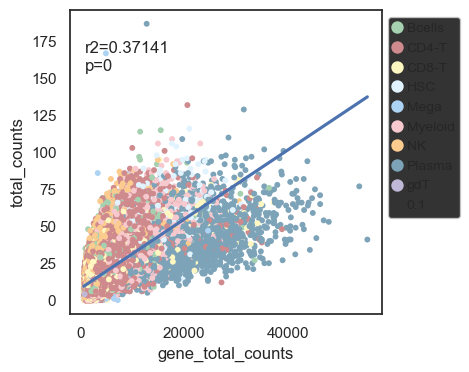

In [241]:
df = adata.obs[['total_counts','gene_total_counts','celltype']]
#df = df[df['celltype'].isin(["CD4-T","CD8-T","NK","Bcells","Myeloid"])]
cells = df.index.tolist()
random.shuffle(cells)
# sns.scatterplot(data=df.loc[cells, :], x='rna', y='herv', hue='celltype', s=5, linewidth=0.01)
sf.regplot(df=df.loc[cells, :], x='gene_total_counts', y='total_counts', hue='celltype', size=0.1, palette=colors,
           rasterized=True, save='rna_herv_cor.pdf')

In [242]:
sc.pp.normalize_total(herv_gene,target_sum=1e4)
sc.pp.log1p(herv_gene)

normalizing counts per cell
    finished (0:00:07)


In [243]:
adata_norm = herv_gene[:,herv_gene.var['type'] == "herv"]

In [244]:
adata_norm.obs['herv_per_1e4umi'] = np.sum(adata_norm.X,axis =1)

/tmp/ipykernel_727519/147680732.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_norm.obs['herv_per_1e4umi'] = np.sum(adata_norm.X,axis =1)


In [245]:
adata_norm.obs['gene_total_counts'] = herv_gene.obs['total_counts']

/tmp/ipykernel_727519/813638034.py:4: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  sns.scatterplot(data=adata_norm.obs.loc[cells, :], x='gene_total_counts', y='herv_per_1e4umi', hue='celltype', s=5, linewidth=0.01, palette=colors, rasterized=True)


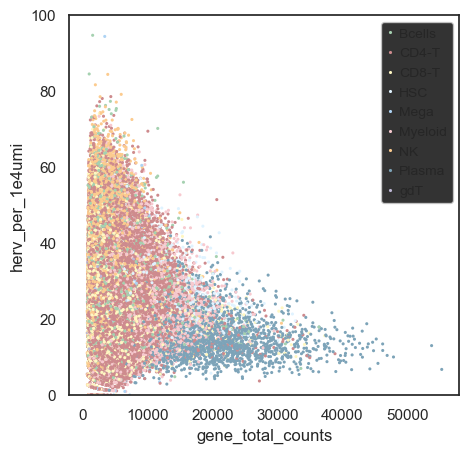

In [248]:
cells = adata_norm.obs_names.tolist()
random.shuffle(cells)
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(data=adata_norm.obs.loc[cells, :], x='gene_total_counts', y='herv_per_1e4umi', hue='celltype', s=5, linewidth=0.01, palette=colors, rasterized=True)
ax.set_ylim(0,100)
ax.grid(False)
plt.legend(
    bbox_to_anchor=(1.0, 1.0),
    fontsize='small',
)
plt.savefig('norm_herv.pdf')
# sf.regplot(df=adata.obs.loc[cells, :], x='UMI_counts', y='herv_per_1e4umi', hue='celltype', size=0.1, palette=colors,
#            rasterized=True, ax=ax)

In [261]:
bulk_herv = sc.read_h5ad('./herv_bulk_celltype.h5ad')

In [264]:
bulk_herv.obs['celltype'] = bulk_herv.obs['indiv_ID_celltype'].apply(lambda x : x.split("_")[-1])

In [266]:
bulk_herv = bulk_herv[bulk_herv.obs['celltype'].isin(['CD4-T','CD8-T','NK','Bcells','Myeloid'])]

/home/zhufan/anaconda3/envs/cellphonedb/lib/python3.12/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/home/zhufan/anaconda3/envs/cellphonedb/lib/python3.12/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


/home/zhufan/anaconda3/envs/cellphonedb/lib/python3.12/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/home/zhufan/anaconda3/envs/cellphonedb/lib/python3.12/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


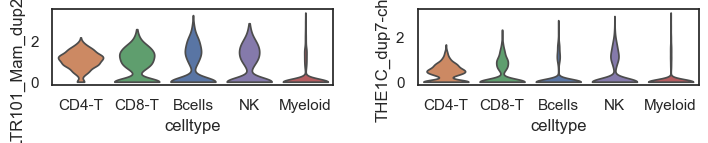

In [270]:
order = ['CD4-T', 'CD8-T','Bcells', 'NK', 'Myeloid']
with rc_context(rc={'figure.figsize': (4,1)}):
    sc.pl.violin(bulk_herv, keys=['LTR101_Mam_dup28-chr9','THE1C_dup7-chr19'], groupby='celltype', order= order,stripplot=False, save='herv_markers.pdf')